# jupyter来进行学习sklearn与机器学习

## 第二章 logistic model

## 一、下面对andrew Ng第二章的内容进行编程

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
cd E:\python学习\吴恩达机器学习\machine-learning-ex2\ex2

E:\python学习\吴恩达机器学习\machine-learning-ex2\ex2


In [18]:
data1 = pd.read_csv("ex2data1.txt",header=None,names=("score1","score2","admitted"))
data1.head()

,score1,score2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1. 绘制散点图

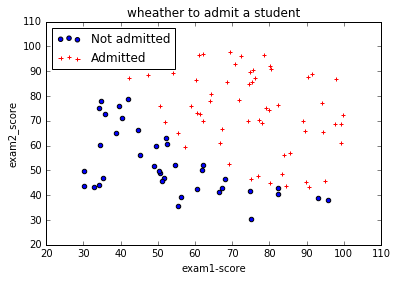

In [4]:
notadmit = data1[data1.admitted == 0]
plt.scatter(notadmit.score1,notadmit.score2,label="Not admitted")
admit = data1[data1.admitted == 1]
plt.scatter(admit.score1,admit.score2,label="Admitted",color="red",marker="+")
plt.legend(loc="upper left")
plt.xlabel("exam1-score")
plt.ylabel("exam2_score")
plt.title("wheather to admit a student")

#### 从上图中可以明显看出来，被录取的学生普遍第二门成绩要高一些

### 2.下面考虑定义sigmoid函数：
$$h_g(x)=g(\theta^Tx)$$,其中$$g(z)=\frac{1}{1+e^{-z}}$$


In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

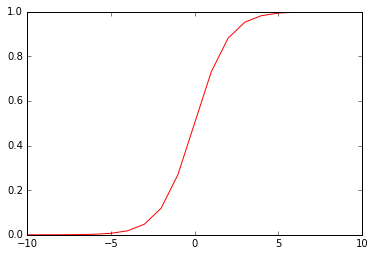

In [6]:
seq = np.arange(-10, 10, step=1)
plt.plot(seq, sigmoid(seq), "r")

### 3. cost function and gradient
定义costfunction函数来返回cost和gradient梯度

In [161]:
# cost function
def costfunction(theta, X, y,):
    left = -y.T.dot(np.log(sigmoid(X.dot(theta))))
    right = (1-y).T.dot(np.log(1-sigmoid(X.dot(theta))))
    cost = np.sum(left - right)/ len(X)
    return(cost)


costfunction的向量形式是：
$$h=g(X\theta)$$
$$J(\theta)=\frac{1}{m}(-y^{T}log(h)-(1-y)^{T}log(1-h)$$

In [19]:
data1.insert(0, 'Ones', 1)
data1.head()

,Ones,score1,score2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [178]:
X = data1.iloc[:,0:3]
y = data1.iloc[:,3]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)#.reshape(3,1)
X.shape,y.shape,theta.shape,np.matrix(X).shape, np.matrix(y).shape

((100, 3), (100,), (3,), (100, 3), (1, 100))

**这里我想要提及的是：array对象有时候是一维的数组，而pd中取index为1个列会返回一个一维的数组，而若是一个：则会返回一个二维数组**

In [162]:
costfunction(theta, X, y)

0.69314718055994518

通过上面的函数定义了cost function,接下来考虑实现梯度下降法：
$$\theta_{j}:=\theta_{j}-\frac{\alpha}{m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j$$
用向量形式表示就是：
$$\theta:=\theta-\frac{\alpha}{m}X^{T}(g(X\theta)-y)$$

In [180]:
# 计算梯度
def gradient(theta, X, y):
    gradi = np.dot(X.T,(sigmoid(X.dot(theta))-y))/len(X)
    return gradi

In [181]:
gradient(theta,X, y)
#sigmoid(X.dot(theta)).shape, y.shape

array([ -0.1       , -12.00921659, -11.26284221])

Now we can use SciPy's truncated newton (TNC) implementation to find the optimal parameters.

In [183]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costfunction, x0=theta, fprime=gradient, args=(X,y))
result

(array([-25.16131853,   0.20623159,   0.20147149]), 36, 0)

In [184]:
costfunction(result[0], X, y)

0.20349770158947497

### 4. 决策
既然有了以上的函数，则可以做一个预测函数，来决定是否录取

In [218]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
accuracy = sum(predictions == y)
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


## 二、regularized logistic regression
为了防止过拟合，需要考虑变量筛选，或者加入惩罚项

### 1. 数据visualization

In [238]:
data2 = pd.read_csv("ex2data2.txt", header=None, names=("test1","test2","admit"))
data2.head()

,test1,test2,admit
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


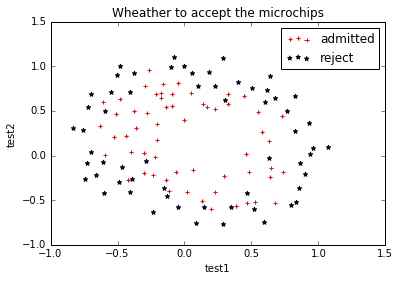

In [230]:
data2_admit = data2[data2.admit==1]
data2_noadmit = data2[data2.admit==0]
plt.scatter(data2_admit.test1, data2_admit.test2,c = "red", marker = "+", label="admitted")
plt.scatter(data2_noadmit.test1, data2_noadmit.test2,c = "blue", marker = "*", label="reject")
plt.xlabel("test1")
plt.ylabel("test2")
plt.legend(loc="best")
plt.title("Wheather to accept the microchips")

可以看出来那些被拒收的产品，波动比较大；
### 2. feature mapping 建立新的预测变量

In [234]:
data2.head()

,test1,test2,admit
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [243]:
degree = 5
x1 = data2['test1']
x2 = data2['test2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('test1', axis=1, inplace=True)
data2.drop('test2', axis=1, inplace=True)

data2.head()

,admit,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


接下来需要调整在上面所定义的函数
### 3. cost function for regularized logstic regression
因此cost  function可以定义为：
$$J(\theta) = - \frac{1}{m}\sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$

In [260]:
def regcost(theta, X, y, learningrate):
    
    first = np.multiply(y, np.log(sigmoid(X.dot(theta.T))))
    second = np.multiply(1-y, np.log(1-sigmoid(X.dot(theta.T))))
    third = learningrate * np.sum(np.power(theta[1:],2)) / (2 * len(X))
    return third-np.sum(first + second)/len(X)


### 4. 计算梯度
$$\begin{align*}& \text{Repeat}\ \lbrace \newline& \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline& \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline& \rbrace\end{align*}$$

In [279]:
def reggradient(theta,X,y,learningrate):
    grad = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        term = np.sum((sigmoid(X.dot(theta))-y).dot(X[:,i]))/(len(X))
        if i == 0:
            grad[i] = term
        else:
            grad[i] = term + learningRate * theta[i] / len(X)
            
    return grad
            

In [277]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)
learningRate = 1

X2.shape, y2.shape

((118, 11), (118,))

In [276]:
regcost(theta2, X2, y2, learningRate)

0.6931471805599454

In [281]:
reggradient(theta2, X2, y2, learningRate)

array([ 0.00847458,  0.01878809,  0.05034464,  0.01150133,  0.01835599,
        0.00732393,  0.00819244,  0.03934862,  0.00223924,  0.01286005,
        0.00309594])

In [288]:
result2 = opt.fmin_tnc(func=regcost, x0=theta2, fprime=reggradient, args=(X2, y2, learningRate))
result2

(array([ 0.53010247,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264304, -0.9503358 ,
         0.0344085 ]), 22, 1)

In [293]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
accuracy = sum(predictions == y2)
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


### 三、使用skit-learn

In [294]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [295]:
model.score(X2, y2)

0.66101694915254239